In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/housing.csv')

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df['location'] = df['latitude'] * df['longitude']

df = df.dropna()

features = [
    'location', 'housing_median_age', 'population',
    'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
]
X = df[features]
y = df['median_house_value']

X = (X - X.mean()) / X.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [4]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"\nScikit-learn Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Scikit-learn Linear Regression Performance:
MAE: 54941.75
RMSE: 75038.20
R² Score: 0.5883


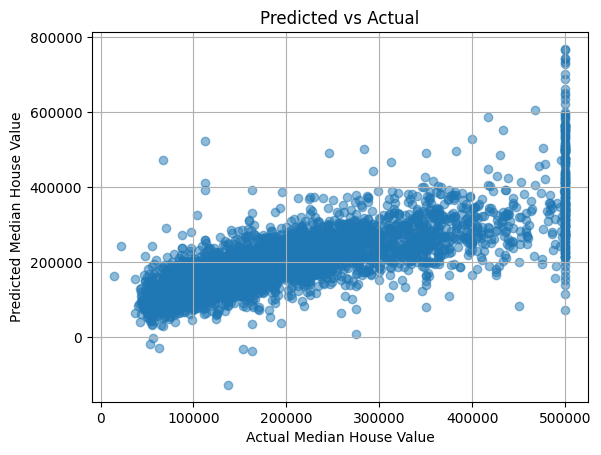

In [5]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()